In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
image1 = cv2.imread(r"image.jpg")

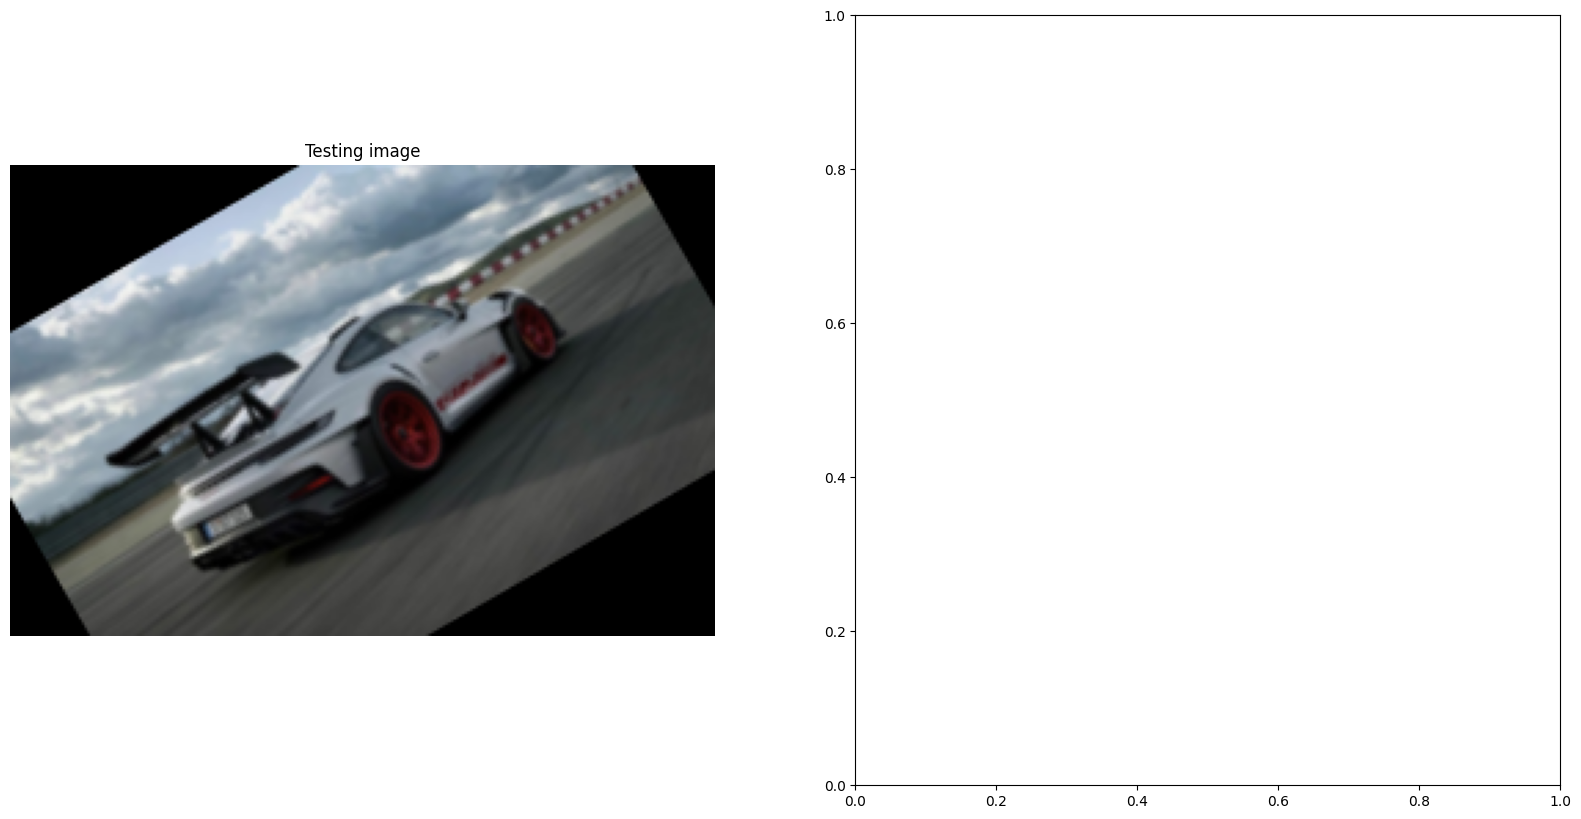

In [9]:
if image1 is None:
    print("Error in loading the image")
else:
    #convert the image to RGB
    training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    #convert the image to gray image
    training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

    #creating test image by adding scale invariance and rotational invariance
    test_image = cv2.pyrDown(training_image)
    test_image = cv2.pyrDown(test_image)
    num_rows, num_cols = test_image.shape[:2]

    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)

    test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

    test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

    #displaying the test and training image
    fig, plots = plt.subplots(1,2,figsize=(20,10))

    plots[0].set_title("Training Image")
    plots[0].imshow(training_image)
    plots[0].axis('off')

    plots[0].set_title('Testing image')
    plots[0].imshow(test_image)
    plots[0].axis('off')

    plt.show()




In [10]:
#SIFT Detection
sift = cv2.SIFT_create()

In [11]:
#Detect keypoints and descriptors for both images
keypoints_train, decriptors_train = sift.detectAndCompute(training_gray, None)
keypoints_test, dexcriptors_test = sift.detectAndCompute(test_gray, None)